In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [ ]:
from text_recognizer.networks.residual_network import IdentityBlock, ResidualBlock, BasicBlock, BottleNeckBlock, ResidualLayer, ResidualNetwork

In [ ]:
IdentityBlock(32, 64)

In [ ]:
ResidualBlock(32, 64)

In [ ]:
dummy = torch.ones((1, 32, 224, 224))

block = BasicBlock(32, 64)
block(dummy).shape
print(block)

In [ ]:
dummy = torch.ones((1, 32, 10, 10))

block = BottleNeckBlock(32, 64)
block(dummy).shape
print(block)

In [ ]:
dummy = torch.ones((1, 64, 48, 48))

layer = ResidualLayer(64, 128, block=BasicBlock, num_blocks=3)
layer(dummy).shape

In [ ]:
blocks_sizes=[64, 128, 256, 512]
list(zip(blocks_sizes, blocks_sizes[1:]))

In [ ]:
e = Encoder(depths=[2, 1], block_sizes= [96, 128])

In [ ]:
Encoder(**{"depths": [2, 1], "block_sizes": [96, 128]})

In [ ]:
from text_recognizer.networks import WideResidualNetwork

In [ ]:
wr = WideResidualNetwork(
            in_channels= 1,
            num_classes= 80,
            depth= 16,
            num_layers= 4,
            width_factor= 2,
            dropout_rate= 0.2,
            activation= "SELU",
            use_decoder= False,
)

In [2]:
from torchsummary import summary

In [ ]:
summary(wr, (1, 28, 14), device="cpu", depth=10)

In [ ]:
np.inf

In [3]:
from text_recognizer.networks.transformer.positional_encoding import PositionalEncoding

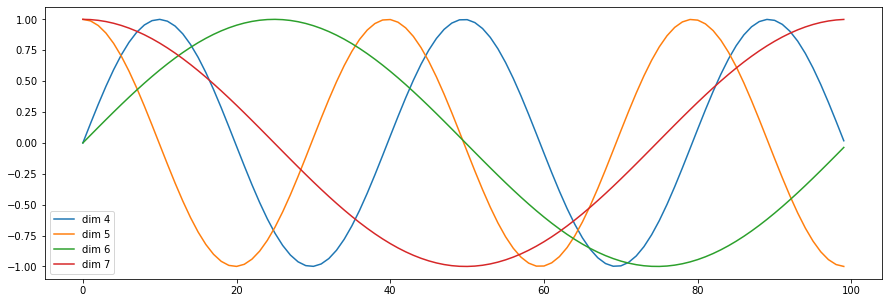

In [4]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None

In [5]:
from text_recognizer.networks.densenet import DenseNet,_DenseLayer,_DenseBlock

In [ ]:
dl = _DenseLayer(64, 4, 4, 0)

In [ ]:
db = _DenseBlock(2, 64, 32, 4, 0)

In [ ]:
x = torch.randn(2, 64, 28, 28)

In [ ]:
dl(x).shape

In [ ]:
db(x).shape

In [18]:
growth_rate=4, block_config=(6, 6, 6), compression=0.5,
                 num_init_features=24, bn_size=4, drop_rate=0, avgpool_size=8,
                 num_classes=10

IndentationError: unexpected indent (<ipython-input-18-9316fb6caa59>, line 2)

In [29]:
dnet = DenseNet(8, (6, 6, 6), 1, 24, 80, 4, 0, True)

In [30]:
summary(dnet, (1, 28, 28), device="cpu", depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 80]                  --
|    └─Conv2d: 2-1                       [-1, 24, 28, 28]          216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 28]          48
|    └─ReLU: 2-3                         [-1, 24, 28, 28]          --
|    └─_DenseBlock: 2-4                  [-1, 72, 28, 28]          23,184
|    └─_Transition: 2-5                  [-1, 36, 14, 14]          2,736
|    └─_DenseBlock: 2-6                  [-1, 84, 14, 14]          25,632
|    └─_Transition: 2-7                  [-1, 42, 7, 7]            3,696
|    └─_DenseBlock: 2-8                  [-1, 90, 7, 7]            26,856
|    └─ReLU: 2-9                         [-1, 90, 7, 7]            --
|    └─AdaptiveAvgPool2d: 2-10           [-1, 90, 1, 1]            --
|    └─Rearrange: 2-11                   [-1, 90]                  --
|    └─Linear: 2-12                      [-1, 80]                 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 80]                  --
|    └─Conv2d: 2-1                       [-1, 24, 28, 28]          216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 28]          48
|    └─ReLU: 2-3                         [-1, 24, 28, 28]          --
|    └─_DenseBlock: 2-4                  [-1, 72, 28, 28]          23,184
|    └─_Transition: 2-5                  [-1, 36, 14, 14]          2,736
|    └─_DenseBlock: 2-6                  [-1, 84, 14, 14]          25,632
|    └─_Transition: 2-7                  [-1, 42, 7, 7]            3,696
|    └─_DenseBlock: 2-8                  [-1, 90, 7, 7]            26,856
|    └─ReLU: 2-9                         [-1, 90, 7, 7]            --
|    └─AdaptiveAvgPool2d: 2-10           [-1, 90, 1, 1]            --
|    └─Rearrange: 2-11                   [-1, 90]                  --
|    └─Linear: 2-12                      [-1, 80]                 

In [34]:
list(dnet.children())[0][:-2]

Sequential(
  (0): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): _DenseBlock(
    (dense_block): ModuleList(
      (0): _DenseLayer(
        (dense_layer): Sequential(
          (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(24, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
          (5): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (1): _DenseLayer(
        (dense_layer): Sequential(
          (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(32, 32, kernel_size=(1, 1)

In [37]:
torch.nn.Sequential(*list(dnet.children())[0][:-2])

Sequential(
  (0): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): _DenseBlock(
    (dense_block): ModuleList(
      (0): _DenseLayer(
        (dense_layer): Sequential(
          (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(24, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
          (5): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (1): _DenseLayer(
        (dense_layer): Sequential(
          (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(32, 32, kernel_size=(1, 1)

In [24]:
dnet.eval()

DenseNet(
  (densenet): Sequential(
    (0): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): _DenseBlock(
      (dense_block): ModuleList(
        (0): _DenseLayer(
          (dense_layer): Sequential(
            (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): ReLU(inplace=True)
            (2): Conv2d(24, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (4): ReLU(inplace=True)
            (5): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
        )
        (1): _DenseLayer(
          (dense_layer): Sequential(
            (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): ReLU(

In [34]:
dnet(torch.randn(1, 28,28)).shape

torch.Size([1, 80])

In [35]:
img = torch.randn(28, 28)

In [36]:
img[(None,)*2].shape

torch.Size([1, 1, 28, 28])